# Introduction to interacting with APIs using Python

## What is an API?

An application programming interface (API) is an abstract idea, it represent a standard way of interacting with some kind of resource. 

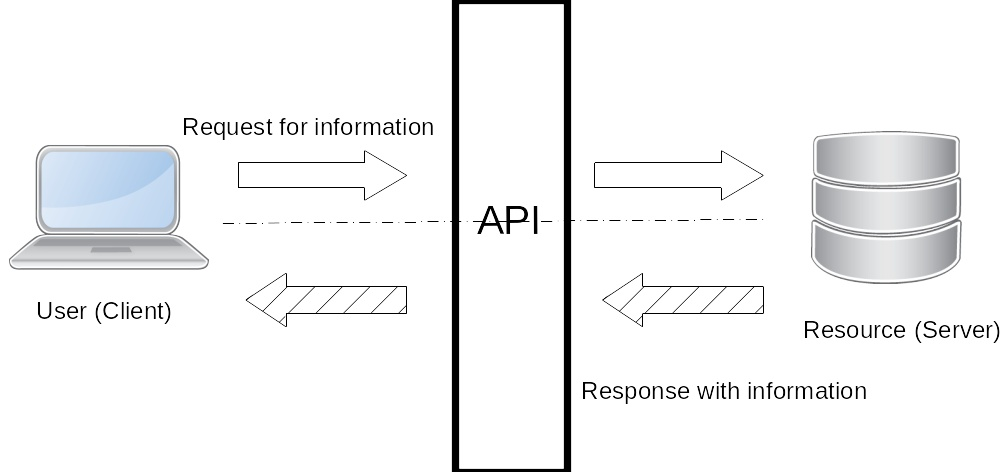

An organisation can change how or where data is stored without affecting users because the API will present a standard way for users to interact with a service.

Many services provide developers an oppurunity to access their services via an API which generally allows more flexiblity than an interface provided by a website. Apps related to weather, transport or social media depend on using API.


**NB:** When working with an API be sure to check that the usage policy!!

## Example: Using OpenWeatherMap's API

The API documentation will tell how how to interact with the API, what format to expect our response and will inform us of any usage conditions/restrictions.

Docs at ( https://openweathermap.org/api/one-call-api#history )

An API request to a server is sent as text consisting of: 

1) A url (or endpoint)
2) Parameters describing the nature of the request
3) Authentication 

The Python library,_requests_ help us to create an API request.

In [6]:
import requests
from datetime import datetime, timedelta

In [7]:
time_now = datetime.utcnow().timestamp() # UTC time now
time_4_days_ago = time_now - timedelta(days=4).seconds

In [8]:
with open('.secrets') as file:
    auth_token = file.read() 

In [9]:
#auth_token = 

In [10]:
base_url = 'https://api.openweathermap.org/data/2.5/onecall/timemachine?'

In [11]:
parameters = {'lat': 52.293236, 'lon': -6.502330, 'dt': int(time_4_days_ago), 'exclude':"current,minutely,daily,alerts", 'appid':auth_token}

In [12]:
r = requests.get(base_url, params=parameters)
#r.url

In [13]:
r.status_code # Check to see whether the request was successful

200

Our request will return by answer with a data in the json format, we can use the _json_ library to make this easier to work with.

In [14]:
#r.text

In [15]:
import json

In [16]:
response = json.loads(r.text)
#response

In [17]:
for each_hour in response['hourly']:
    date_time = datetime.fromtimestamp(each_hour['dt'])
    print(f"The weather on {date_time} was {each_hour['temp']} (k).")    

The weather on 2021-01-15 00:00:00 was 277.77 (k).
The weather on 2021-01-15 01:00:00 was 277.22 (k).
The weather on 2021-01-15 02:00:00 was 276.83 (k).
The weather on 2021-01-15 03:00:00 was 275.63 (k).
The weather on 2021-01-15 04:00:00 was 275.56 (k).
The weather on 2021-01-15 05:00:00 was 274.91 (k).
The weather on 2021-01-15 06:00:00 was 275.17 (k).
The weather on 2021-01-15 07:00:00 was 275.23 (k).
The weather on 2021-01-15 08:00:00 was 275.78 (k).
The weather on 2021-01-15 09:00:00 was 276.42 (k).
The weather on 2021-01-15 10:00:00 was 277.79 (k).
The weather on 2021-01-15 11:00:00 was 280.33 (k).
The weather on 2021-01-15 12:00:00 was 281.41 (k).
The weather on 2021-01-15 13:00:00 was 281.43 (k).
The weather on 2021-01-15 14:00:00 was 281.78 (k).


## Introduction to Python

In [18]:
import pandas as pd

In [19]:
dataframe = pd.read_csv('waterleveldata.csv')

In [20]:
dataframe.head()

datetime  value
0  2020-12-07 13:00  0.470
1  2020-12-07 13:15  0.469
2  2020-12-07 13:30  0.467
3  2020-12-07 13:45  0.464
4  2020-12-07 14:00  0.465

In [21]:
dataframe.describe()

value
count  3360.000000
mean      0.627411
std       0.280473
min       0.371000
25%       0.455000
50%       0.539000
75%       0.675000
max       2.320000

In [22]:
dataframe.iloc[:4]

datetime  value
0  2020-12-07 13:00  0.470
1  2020-12-07 13:15  0.469
2  2020-12-07 13:30  0.467
3  2020-12-07 13:45  0.464

<AxesSubplot:>

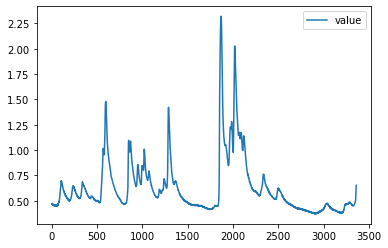

In [23]:
dataframe.plot()